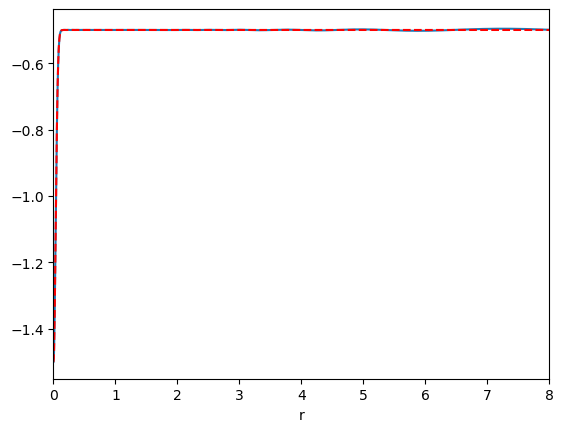

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

N = 50                                                   # Truncation ordem

L0 = 1                                             # Map parameter 

col = np.cos(np.arange(2*N + 3)*math.pi /(2*N + 2))      # collocation points (Verificado)
                               
colr = col[1:N+2]                                                         # physical domain (Verificado)             

r1 = L0 * colr/(np.sqrt(1-colr**2)) 
r = np.flip(r1)                                           # physical domain (Verificado)  

#out_r = open('r_30_L02.txt', 'a')
#out_r.write(' ' +' '.join(str('%.18f'%n) for n in r)+'\n')
#out_r.close()


# Base Matrix (Tchebyshev Polinomials): 

SB = np.zeros([N+2,N+1])
rSB = np.zeros([N+2,N+1])
rrSB = np.zeros([N+2,N+1])


for i in range(N+1+1):                                    # SB[:,0] = function in origin
  SB[i,] = np.sin((2*i+1)*np.arctan(L0/r))                                                  

for i in range(N+1+1):
  rSB[i,] = -np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**2*(1+L0**2/r**2)) 

for i in range(N+1+1):
  rrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/r))*(2*i+1)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0**3/(r**5*(1+L0**2/r**2)**2)                     

# Base function



psi = SB[0:N+1,:]        # origin included in psi[:,0]
rpsi = rSB[0:N+1,:]
rrpsi = rrSB[0:N+1,:]



# Initial conditions of Phi (Scalar field)                                    

#r0 = 0

#sigma = 1/2

# L0 = 1 and sigma = 1/2 and Phi_init = A0*(np.exp(-(r-r0)**2/sigma**2) + np.exp(-(r+r0)**2/sigma**2))   

#A0 =  0.76  #  0.7602785  -> disperse ;  # 0.77 -> colapse 

# L0 = 3 and sigma = 1/2 and Phi_init = A0*(np.exp(-(r-r0)**2/sigma**2) + np.exp(-(r+r0)**2/sigma**2))   

#A0 =  0.75981136951800  #  0.759811369518  -> disperse ;  # 0.759811369518001   -> colapse 

Phi_c = 1/2

Phi_0 = -1/2

R = 0.05  # new parameter. A0 substitution

Phi_init = 2*Phi_0*np.exp(-r**2/R**2) - Phi_c          # Phi initial data out of origin (Verificado)

inv_psi = np.linalg.inv(psi)
  
a0 = np.dot(Phi_init, inv_psi)  # coeficients a(0)  (Verificado)

#out_a = open('a0_30_L02.txt', 'a')
#out_a.write(' ' +' '.join(str('%.18f'%n) for n in a0)+'\n')
#out_a.close()


Phi = np.dot(a0, psi)        # approximative solution in t = 0
rPhi= np.dot(a0, rpsi)

########################### Plot: Initial Conditions of Phi

M = 3000       # plot truncation

rplot = np.linspace(0.00000000000000001,15,M)

colplot = rplot/np.sqrt(L0**2 + rplot**2)

SBplot = np.zeros([N+1,M])
rSBplot = np.zeros([N+1,M])
rrSBplot = np.zeros([N+1,M])

for i in range(N+1):
  SBplot[i,] = np.sin((2*i+1)*np.arctan(L0/rplot))

for i in range(N+1):
  rSBplot[i,] = -np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0/(rplot**2*(1+L0**2/rplot**2)) 

for i in range(N+1):
  rrSBplot[i,] = -np.sin((2*i+1)*np.arctan(L0/rplot))*(2*i+1)**2*L0**2/(rplot**4*(1+L0**2/rplot**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0/(rplot**3*(1+L0**2/rplot**2))-2*np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0**3/(rplot**5*(1+L0**2/rplot**2)**2)                     

psiplot = SBplot[0:(N+1),:] 
rpsiplot = rSBplot[0:(N+1),:]
rrpsiplot = rrSBplot[0:(N+1),:]

Phiplot_init = 2*Phi_0*np.exp(-rplot**2/R**2) - Phi_c    

#Phiplot_init = np.hstack((0, Phiplot_int))

Phiplot = np.dot(a0, psiplot)

plt.plot(rplot, Phiplot, rplot, Phiplot_init, "--r")   #(Verificado)
plt.xlabel('r')
plt.xlim(0,8)
plt.show()


In [2]:
r

array([6.12323400e-17, 3.08096710e-02, 6.16778888e-02, 9.26636462e-02,
       1.23826835e-01, 1.55228713e-01, 1.86932397e-01, 2.19003380e-01,
       2.51510096e-01, 2.84524531e-01, 3.18122901e-01, 3.52386404e-01,
       3.87402064e-01, 4.23263696e-01, 4.60073002e-01, 4.97940834e-01,
       5.36988659e-01, 5.77350269e-01, 6.19173786e-01, 6.62624031e-01,
       7.07885343e-01, 7.55164946e-01, 8.04697006e-01, 8.56747548e-01,
       9.11620453e-01, 9.69664834e-01, 1.03128418e+00, 1.09694775e+00,
       1.16720497e+00, 1.24270377e+00, 1.32421401e+00, 1.41265815e+00,
       1.50915142e+00, 1.61505545e+00, 1.73205081e+00, 1.86223672e+00,
       2.00827073e+00, 2.17356810e+00, 2.36259336e+00, 2.58129755e+00,
       2.83779394e+00, 3.14343920e+00, 3.51463544e+00, 3.97598354e+00,
       4.56613958e+00, 5.34952751e+00, 6.44210712e+00, 8.07579391e+00,
       1.07917187e+01, 1.62132657e+01, 3.24573411e+01])

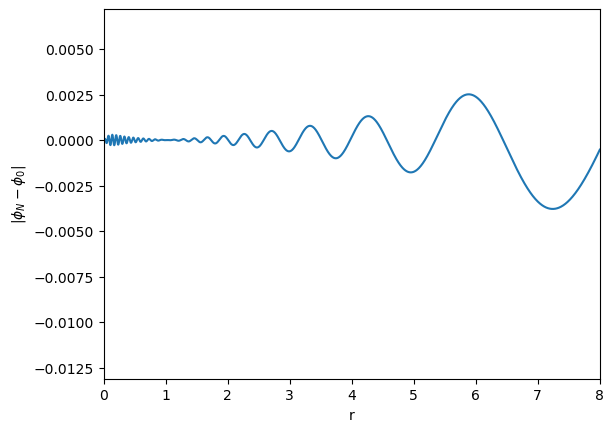

In [3]:
erro = Phiplot_init - Phiplot

plt.plot(rplot, erro)
plt.xlabel('r')
plt.xlim(0,8)
plt.ylabel("$|\phi_N - \phi_0|$")
plt.show()

In [4]:
Pi_0 = np.zeros(N+1)
b0 = np.dot(Pi_0, psi)
Pi = np.dot(b0, psi)

c0 = np.zeros([N+1])     # guess value
for i in range(N+1):
  c0[i] = 0.0001

V = 1/4*(Phi**2 - Phi_0**2)**2  # V(Phi)

dV = Phi**3 - Phi_0**2  #dV/dPhi

coeforigin = 1/L0**2*(-(-1)**(np.arange(N+1))*(2*np.arange(1,N+2)-1)**2)    # 1/r * d\phi/dr

tol = 1e-19
#cnew = 0 
#err = abs(c0 - cnew)

n = 0
nf = 100

# Newton Raphson loop
#while max(err) >= tol:
while n <= nf:
  rChi = np.dot(c0 ,rpsi)
  rrChi = np.dot(c0, rrpsi)
  H0_0 = 4*rrChi[0] + 8*np.dot(coeforigin,c0) + 1/2*(rPhi[0])**2 + V[0]
  H0_int = 4*rChi[1:N+1]**2 + 4*rrChi[1:N+1] + 8/r[1:N+1]*rChi[1:N+1] + 1/2*rPhi[1:N+1]**2 + V[1:N+1]
  H0 = np.hstack((H0_0, H0_int))
  J1 = rChi*rpsi
  JH_0 = 8*J1[:,0]+ 4*rrpsi[:,0] + 8*coeforigin
  JH_int = 8*J1[:,1:N+1] + 4*rrpsi[:,1:N+1] + 8/r[1:N+1]*rpsi[:,1:N+1]  
  JH = np.column_stack((JH_0, JH_int))
  inv_JH = np.linalg.inv(JH)
  cnew = c0
  c0 = c0 - np.dot(H0, inv_JH)
  err = abs(c0 - cnew)
  print(max(err))
  if  max(err) <= tol:
    print(c0)
    break
  n = n + 1


0.02126065785264946
0.000602060477179818
3.581378472186647e-07
8.791231631555263e-14
2.0816681711721685e-17
6.938893903907228e-18
1.734723475976807e-17
1.734723475976807e-17
1.734723475976807e-17
1.3877787807814457e-17
1.0408340855860843e-17
1.734723475976807e-17
4.163336342344337e-17
4.163336342344337e-17
2.7755575615628914e-17
1.0408340855860843e-17
1.734723475976807e-17
1.3877787807814457e-17
3.469446951953614e-18
6.938893903907228e-18
2.0816681711721685e-17
1.734723475976807e-17
3.469446951953614e-18
3.469446951953614e-18
2.0816681711721685e-17
6.938893903907228e-18
2.42861286636753e-17
2.42861286636753e-17
6.938893903907228e-18
1.734723475976807e-17
5.204170427930421e-18
3.469446951953614e-18
4.336808689942018e-18
6.938893903907228e-18
1.3877787807814457e-17
1.3877787807814457e-17
3.122502256758253e-17
5.204170427930421e-18
2.0816681711721685e-17
3.469446951953614e-18
1.3877787807814457e-17
2.42861286636753e-17
6.938893903907228e-18
2.0816681711721685e-17
2.7755575615628914e-17
1.

In [5]:
V

array([1.00000000e+00, 3.31789187e-01, 1.76921876e-02, 2.76838127e-04,
       1.18185183e-06, 1.06219663e-09, 1.80820868e-13, 5.42085241e-18,
       2.63072959e-23, 1.73333695e-29, 7.70371978e-34, 3.08148791e-33,
       2.77333912e-32, 2.49600521e-31, 2.77333912e-32, 7.70371978e-34,
       1.92592994e-32, 3.08148791e-33, 9.32150093e-32, 6.24001302e-32,
       1.10933565e-31, 2.77333912e-32, 0.00000000e+00, 2.77333912e-32,
       9.32150093e-32, 2.77333912e-32, 6.93334780e-33, 4.93038066e-32,
       7.70371978e-34, 0.00000000e+00, 3.08148791e-33, 3.08148791e-33,
       0.00000000e+00, 3.08148791e-33, 1.92592994e-32, 1.23259516e-32,
       4.93038066e-32, 4.93038066e-32, 1.23259516e-32, 2.77333912e-32,
       1.23259516e-32, 6.93334780e-33, 1.23259516e-32, 7.70371978e-32,
       7.70371978e-32, 3.77482269e-32, 7.70371978e-34, 1.23259516e-32,
       2.77333912e-32, 1.23259516e-32, 1.23259516e-32])

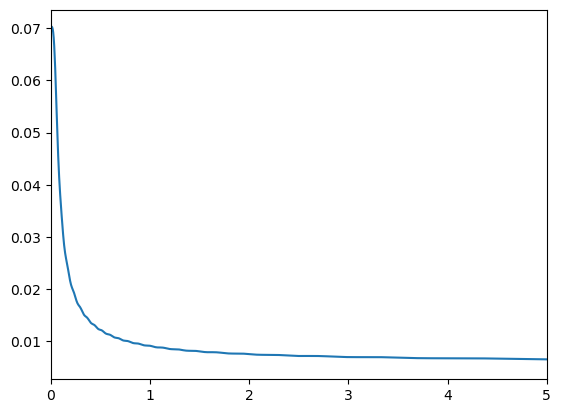

In [6]:

Chiplot = np.dot(c0, psiplot)

rrChiplot = np.dot(c0, rrpsiplot)

plt.plot(rplot,Chiplot)
plt.xlim(0,5)
plt.show()
     

In [7]:
# Equation for Krr: momentum constraint

# Initial values of Krr: Base functions of Krr

# In r = 0: 

SB1 = 1/2*(SB[1:(N+1),:] + SB[0:(N),:])          # VERIFICADO
rSB1 = 1/2*(rSB[1:(N+1),:] + rSB[0:(N),:])
rrSB1 = 1/2*(rrSB[1:(N+1),:] + rrSB[0:(N),:])

# Base functions for Beta

SB2 = np.zeros([N,N+1])      
rSB2 = np.zeros([N,N+1])
rrSB2 = np.zeros([N,N+1])



for i in range(N):                                                   # VERIFICADO
  SB2[i,] = np.sin((2*(i+1/2)+1)*np.arctan(L0/r))                                                  


for i in range(N):
  rSB2[i,] = -np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**2*(1+L0**2/r**2))


for i in range(N):
  rrSB2[i,] = -np.sin((2*i+2)*np.arctan(L0/r))*(2*i+2)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0**3/(r**5*(1+L0**2/r**2)**2)






In [8]:
np.shape(SB2)

(50, 51)

In [9]:
np.shape(SB1)

(50, 51)

In [10]:
Nq = int(3/2*N)           # Quadrature truncation

gauss_quadrature = np.polynomial.legendre.leggauss(Nq + 1) 

new_col = gauss_quadrature[0]            # Legendre quadrature points


# Legendre Polinomials

P = np.zeros([Nq+3,Nq+1])
colP = np.zeros([Nq+3,Nq+1])

P[0,] = 1
P[1,] = new_col

colP[0,] = 0
colP[1,] = 1

for i in range(2,Nq+3):
  P[i,] = ((2*i-1)*new_col*P[i-1,] - (i-1)*P[i-2,])/(i)   

for i in range(2,Nq+3):
  colP[i,] = i*P[i-1] + new_col*colP[i-1]

P_max = P[Nq+1]

colP_max = colP[Nq+1]

wq_col = 2/((1-new_col**2)*colP_max**2)    # Legendre weight (Verificado)

rq = L0*(1+new_col)/(1-new_col)            # Physical quadrature domain

qSB = np.zeros([Nq+1,Nq+1])
qrSB = np.zeros([Nq+1,Nq+1])
qrrSB = np.zeros([Nq+1,Nq+1])


for i in range(Nq+1):
  qSB[i,] = np.sin((2*i+1)*np.arctan(L0/rq))                                                  

for i in range(Nq+1):
  qrSB[i,] = -np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**2*+L0**2)

for i in range(Nq+1):
  qrrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/rq))*(2*i+1)**2*L0**2/(rq**4*(1+L0**2/rq**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**3*(1+L0**2/rq**2))-2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0**3/(rq**5*(1+L0**2/rq**2)**2)                     

qpsi = qSB[0:N+1,:]
rqpsi = qrSB[0:N+1,:]
rrqpsi = qrrSB[0:N+1,:]


qSB1 = 1/2*(qSB[1:(N+1),:] + qSB[0:(N),:])          # VERIFICADO
rqSB1 = 1/2*(qrSB[1:(N+1),:] + qrSB[0:(N),:])
rrqSB1 = 1/2*(qSB[1:(N+1),:] + qrrSB[0:(N),:])



# Initial Phi in quadrature points

#qPhi = np.dot(a0, qpsi)      
#rqPhi= np.dot(a0, rqpsi)

# Initial Pi for quadrature points

#qPi = np.dot(b0, qpsi) 


# Initial Chi for quadrature points:

#qChi = np.dot(c0, qpsi)   # Verificado todos
#rqChi = np.dot(c0, rqpsi)
#rrqChi = np.dot(c0, rrqpsi)

# Initial values of Krr:

#qKrr = np.dot(ck0, qSB1) 

# Alpha na origem

#Alphacenter = (-1)**(np.arange(N+1))


In [11]:
# Filtering

Nc = 0

Nf = N - Nc

coef_f = 36
s = 30

#filter1 = np.ones(N+1)
#filter2 = np.ones(N)
#filter1 = np.hstack((np.ones(Nc),np.exp(- coef_f*((np.arange(N - Nc + 1))/(N-Nc))**s)))
filter1 = np.exp(- coef_f*((np.arange(N - Nc + 1))/(N-Nc))**s)

In [ ]:
# Runge Kutta 4th order

h = 0.0002   # step size
tf = 7

It = int(tf/h)

#t1 = np.linspace(0, tf, It) 

t = 0

Madm = []
Alpha_origin = []
phi_origin = []
L2HC = []
phi_set = []

out_a = open('Alpha_origin.txt', 'a')
out_a.truncate(0)                        # arase the old datas and start the new ones

out_p = open('phi_origin.txt', 'a')
out_p.truncate(0)


M0 = 2*np.dot(np.arange(1, 2*N + 2, 2), c0) # Madm(t = 0)


#matriz = np.concatenate((array1, array2))

while t <= tf:
   
  # First step
  Phi = np.dot(a0, psi)      
  rPhi = np.dot(a0, rpsi)
  rrPhi = np.dot(a0, rrpsi)      
  Pi = np.dot(b0, psi) 
  rPi= np.dot(b0, rpsi)
  Chi = np.dot(c0, psi) 
  rChi = np.dot(c0, rpsi)
  rrChi = np.dot(c0, rrpsi)   
  Matrix_Krr = 2*rChi[1:N+1]*SB1[:,1:N+1] + rSB1[:,1:N+1] + 3/r[1:N+1]*SB1[:,1:N+1]   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi[1:N+1]*rPhi[1:N+1]*np.exp(4*Chi[1:N+1]) # (p,)
  ck0 = np.dot(rhsk, inv_matrix_krr)  # (p,)
  Krr = np.dot(ck0, SB1)              # (p+1,)     
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha_0 = rrpsi[:,0] + 2*coeforigin - np.exp(4*Chi[0])*(Pi[0]**2 - V[0])*psi[:,0]
  Matrix_Alpha_int = rrpsi[:,1:N+1] + 2*(1/r[1:N+1] + rChi[1:N+1])*rpsi[:,1:N+1] - 3/2*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]**2*psi[:,1:N+1] - np.exp(4*Chi[1:N+1])*(Pi[1:N+1]**2 - V[1:N+1])*psi[:,1:N+1] 
  Matrix_Alpha = np.column_stack((Matrix_Alpha_0, Matrix_Alpha_int))
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2[:,1:N+1] - SB2[:,1:N+1]/r[1:N+1]
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha[1:N+1]*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db_origin = 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(a0, coeforigin) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0]
  db_int = Beta[1:N+1]*rPi[1:N+1] + np.exp(-4*Chi[1:N+1])*(2*Alpha[1:N+1]/r[1:N+1] + rAlpha[1:N+1] + 2*rChi[1:N+1]*Alpha[1:N+1])*rPhi[1:N+1] + np.exp(-4*Chi[1:N+1])*Alpha[1:N+1]*rrPhi[1:N+1] - Alpha[1:N+1]*dV[1:N+1]
  db = np.dot(np.hstack((db_origin, db_int)), inv_psi)
  dc = np.dot(Beta*rChi + rBeta/2 - Alpha/2*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K1 = h*(dc)
  L1 = h*(da)
  N1 = h*(db)
  
  # L2-error associated to the Hamiltonian constraint
  qPhi = np.dot(a0, qpsi)      
  rqPhi= np.dot(a0, rqpsi)
  qPi = np.dot(b0, qpsi) 
  qChi = np.dot(c0, qpsi)
  rqChi = np.dot(c0, rqpsi)
  rrqChi = np.dot(c0, rrqpsi) 
  qKrr = np.dot(ck0, qSB1)
  H = 4*rqChi**2 + 4*rrqChi + 8*rqChi/rq + 3/4*np.exp(-4*qChi)*qKrr**2 + np.exp(4*qChi)*(1/2*qPi**2 + np.exp(-4*qChi)/2*rqPhi**2)   # Hamiltonian constraint (HC)
  L2HC.append((1/2*np.dot(H**2,wq_col))**1/2)    # L2 error of HC 
  
  # Alpha origin
  Alpha_0 = 1 + np.dot(al0, psi[:,0])
  Alpha_origin.append(Alpha_0)                   # = Alphacenter in matlab
  out_a.write(str(t) + " " + str(Alpha_0))
  out_a.write(',\n')
  
  # Phi origin:  
  phi_0 = np.dot(a0, psi[:,0])
  phi_origin.append(phi_0)
  out_p.write(str(t) + " " + str(phi_0))
  out_p.write(',\n')
  
  # ADM mass:
  Madm.append(2*np.dot(np.arange(1, 2*N + 2, 2), c0))

  # Second step
  Phi = np.dot(a0 + L1/2, psi)     
  rPhi= np.dot(a0 + L1/2 , rpsi)
  rrPhi = np.dot(a0 + L1/2, rrpsi) 
  Pi = np.dot(b0 + N1/2, psi)
  rPi= np.dot(b0 + N1/2, rpsi)
  Chi = np.dot(c0 + K1/2, psi)
  rChi = np.dot(c0 + K1/2, rpsi)
  rrChi = np.dot(c0 + K1/2, rrpsi)
  Matrix_Krr = 2*rChi[1:N+1]*SB1[:,1:N+1] + rSB1[:,1:N+1] + 3/r[1:N+1]*SB1[:,1:N+1]   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi[1:N+1]*rPhi[1:N+1]*np.exp(4*Chi[1:N+1]) # (p,)
  ck0 = np.dot(rhsk, inv_matrix_krr)  # (p,)
  Krr = np.dot(ck0, SB1)              # (p+1,)     
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha_0 = rrpsi[:,0] + 2*coeforigin - np.exp(4*Chi[0])*Pi[0]**2*psi[:,0]
  Matrix_Alpha_int = rrpsi[:,1:N+1] + 2*(1/r[1:N+1] + rChi[1:N+1])*rpsi[:,1:N+1] - 3/2*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]**2*psi[:,1:N+1] - np.exp(4*Chi[1:N+1])*(Pi[1:N+1]**2 - V[1:N+1])*psi[:,1:N+1] 
  Matrix_Alpha = np.column_stack((Matrix_Alpha_0, Matrix_Alpha_int))
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2[:,1:N+1] - SB2[:,1:N+1]/r[1:N+1]
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha[1:N+1]*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db_origin = 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(a0, coeforigin) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0]
  db_int = Beta[1:N+1]*rPi[1:N+1] + np.exp(-4*Chi[1:N+1])*(2*Alpha[1:N+1]/r[1:N+1] + rAlpha[1:N+1] + 2*rChi[1:N+1]*Alpha[1:N+1])*rPhi[1:N+1] + np.exp(-4*Chi[1:N+1])*Alpha[1:N+1]*rrPhi[1:N+1] - Alpha[1:N+1]* dV[1:N+1]
  db = np.dot(np.hstack((db_origin, db_int)), inv_psi)
  dc = np.dot(Beta*rChi + rBeta/2 - Alpha/2*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K2 = h*(dc)
  L2 = h*(da)
  N2 = h*(db)

  # Third step
  Phi = np.dot(a0 + L2/2, psi)     
  rPhi = np.dot(a0 + L2/2 , rpsi)
  rrPhi = np.dot(a0 + L2/2, rrpsi) 
  Pi = np.dot(b0 + N2/2, psi)
  rPi= np.dot(b0 + N2/2, rpsi)
  Chi = np.dot(c0 + K2/2, psi)
  rChi = np.dot(c0 + K2/2, rpsi)
  rrChi = np.dot(c0 + K2/2, rrpsi)
  Matrix_Krr = 2*rChi[1:N+1]*SB1[:,1:N+1] + rSB1[:,1:N+1] + 3/r[1:N+1]*SB1[:,1:N+1]   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi[1:N+1]*rPhi[1:N+1]*np.exp(4*Chi[1:N+1]) # (p,)
  ck0 = np.dot(rhsk, inv_matrix_krr)  # (p,)
  Krr = np.dot(ck0, SB1)              # (p+1,)     
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha_0 = rrpsi[:,0] + 2*coeforigin - np.exp(4*Chi[0])*Pi[0]**2*psi[:,0]
  Matrix_Alpha_int = rrpsi[:,1:N+1] + 2*(1/r[1:N+1] + rChi[1:N+1])*rpsi[:,1:N+1] - 3/2*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]**2*psi[:,1:N+1] - np.exp(4*Chi[1:N+1])*(Pi[1:N+1]**2 - V[1:N+1])*psi[:,1:N+1] 
  Matrix_Alpha = np.column_stack((Matrix_Alpha_0, Matrix_Alpha_int))
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2[:,1:N+1] - SB2[:,1:N+1]/r[1:N+1]
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha[1:N+1]*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db_origin = 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(a0, coeforigin) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0]
  db_int = Beta[1:N+1]*rPi[1:N+1] + np.exp(-4*Chi[1:N+1])*(2*Alpha[1:N+1]/r[1:N+1] + rAlpha[1:N+1] + 2*rChi[1:N+1]*Alpha[1:N+1])*rPhi[1:N+1] + np.exp(-4*Chi[1:N+1])*Alpha[1:N+1]*rrPhi[1:N+1] - Alpha[1:N+1]*dV[1:N+1]
  db = np.dot(np.hstack((db_origin, db_int)), inv_psi)
  dc = np.dot(Beta*rChi + rBeta/2 - Alpha/2*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K3 = h*(dc)
  L3 = h*(da)
  N3 = h*(db) 

  # Forth step
  Phi = np.dot(a0 + L3, psi)     
  rPhi= np.dot(a0 + L3 , rpsi)
  rrPhi = np.dot(a0 + L3, rrpsi) 
  Pi = np.dot(b0 + N3, psi)
  rPi= np.dot(b0 + N3, rpsi)
  Chi = np.dot(c0 + K3, psi)
  rChi = np.dot(c0 + K3, rpsi)
  rrChi = np.dot(c0 + K3, rrpsi)
  Matrix_Krr = 2*rChi[1:N+1]*SB1[:,1:N+1] + rSB1[:,1:N+1] + 3/r[1:N+1]*SB1[:,1:N+1]   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi[1:N+1]*rPhi[1:N+1]*np.exp(4*Chi[1:N+1]) # (p,)
  ck0 = np.dot(rhsk, inv_matrix_krr)  # (p,)
  Krr = np.dot(ck0, SB1)              # (p+1,)     
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha_0 = rrpsi[:,0] + 2*coeforigin - np.exp(4*Chi[0])*Pi[0]**2*psi[:,0]
  Matrix_Alpha_int = rrpsi[:,1:N+1] + 2*(1/r[1:N+1] + rChi[1:N+1])*rpsi[:,1:N+1] - 3/2*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]**2*psi[:,1:N+1] - np.exp(4*Chi[1:N+1])*(Pi[1:N+1]**2 - V[1:N+1])*psi[:,1:N+1] 
  Matrix_Alpha = np.column_stack((Matrix_Alpha_0, Matrix_Alpha_int))
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2[:,1:N+1] - SB2[:,1:N+1]/r[1:N+1]
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha[1:N+1]*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db_origin = 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(a0, coeforigin) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0]
  db_int = Beta[1:N+1]*rPi[1:N+1] + np.exp(-4*Chi[1:N+1])*(2*Alpha[1:N+1]/r[1:N+1] + rAlpha[1:N+1] + 2*rChi[1:N+1]*Alpha[1:N+1])*rPhi[1:N+1] + np.exp(-4*Chi[1:N+1])*Alpha[1:N+1]*rrPhi[1:N+1] - Alpha[1:N+1]*dV[1:N+1]
  db = np.dot(np.hstack((db_origin, db_int)), inv_psi)
  dc = np.dot(Beta*rChi + rBeta/2 - Alpha/2*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K4 = h*(dc)
  L4 = h*(da)
  N4 = h*(db)  
  
  t = t + h
#  print(t) 
#  if t > 9:
#    h=0.0001
 
    
  # Evolution functions
  a0 = a0 + 1/6 * (L1 + 2*L2 + 2*L3 + L4)
  b0 = filter1*(b0 + 1/6 * (N1 + 2*N2 + 2*N3 + N4))
  c0 = c0 + 1/6 * (K1 + 2*K2 + 2*K3 + K4)  
  phi_set.append(np.dot(a0, psiplot))
  
  print('t =',t,'rPi =', max(rPi), sep = '\n') 
    

#  pi_set[i,:] = np.dot(b0, psiplot)
#  chi_set[i,:] = np.dot(c0, psiplot)
  
out_a.close()
out_p.close() 
  
t1 = np.linspace(0, tf, len(Alpha_origin)) 

t =
0.0002
rPi =
0.5669016091019343
t =
0.0004
rPi =
1.2878937042190302
t =
0.0006000000000000001
rPi =
2.0602229337129843
t =
0.0008
rPi =
2.8657318117934034
t =
0.001
rPi =
3.695739842972826
t =
0.0012000000000000001
rPi =
4.544971363820548
t =
0.0014000000000000002
rPi =
5.409792711047639
t =
0.0016000000000000003
rPi =
6.287495858080695
t =
0.0018000000000000004
rPi =
7.175948765188073
t =
0.0020000000000000005
rPi =
8.073403381080588
t =
0.0022000000000000006
rPi =
8.978381219913272
t =
0.0024000000000000007
rPi =
9.889600882855378
t =
0.0026000000000000007
rPi =
10.805929909618776
t =
0.002800000000000001
rPi =
11.726351556768421
t =
0.003000000000000001
rPi =
12.649941167673413
t =
0.003200000000000001
rPi =
13.575848946350678
t =
0.003400000000000001
rPi =
14.503287143358422
t =
0.003600000000000001
rPi =
15.431520360656327
t =
0.0038000000000000013
rPi =
16.35985810864885
t =
0.004000000000000001
rPi =
17.287649018731905
t =
0.004200000000000001
rPi =
18.2142762913939
t =
0.00

t =
0.03659999999999989
rPi =
56.63629257507175
t =
0.03679999999999989
rPi =
56.37555776037536
t =
0.03699999999999989
rPi =
56.11271318504429
t =
0.037199999999999886
rPi =
55.84780988346756
t =
0.037399999999999885
rPi =
55.580898248125834
t =
0.037599999999999884
rPi =
55.31202803600085
t =
0.03779999999999988
rPi =
55.04124837491275
t =
0.03799999999999988
rPi =
54.76860776978355
t =
0.03819999999999988
rPi =
54.494154108825164
t =
0.03839999999999988
rPi =
54.21793466965035
t =
0.03859999999999988
rPi =
53.93999612530908
t =
0.038799999999999876
rPi =
53.66038455024578
t =
0.038999999999999875
rPi =
53.379145426179754
t =
0.039199999999999874
rPi =
53.096323647909315
t =
0.03939999999999987
rPi =
52.81196352903807
t =
0.03959999999999987
rPi =
52.52610880762469
t =
0.03979999999999987
rPi =
52.23880265175654
t =
0.03999999999999987
rPi =
51.95008766504908
t =
0.04019999999999987
rPi =
51.660005892068966
t =
0.04039999999999987
rPi =
51.36859882368563
t =
0.040599999999999865
rPi 

t =
0.07460000000000008
rPi =
54.29454074479431
t =
0.07480000000000009
rPi =
54.4334802925788
t =
0.0750000000000001
rPi =
54.57160115922691
t =
0.0752000000000001
rPi =
54.70890337484743
t =
0.0754000000000001
rPi =
54.84538702100569
t =
0.07560000000000011
rPi =
54.981052229820854
t =
0.07580000000000012
rPi =
55.11589918307397
t =
0.07600000000000012
rPi =
55.24992811132597
t =
0.07620000000000013
rPi =
55.38313929304649
t =
0.07640000000000013
rPi =
55.51553305375333
t =
0.07660000000000014
rPi =
55.64710976516157
t =
0.07680000000000015
rPi =
55.77786984434395
t =
0.07700000000000015
rPi =
55.90781375290136
t =
0.07720000000000016
rPi =
56.03694199614314
t =
0.07740000000000016
rPi =
56.16525512227891
t =
0.07760000000000017
rPi =
56.29275372161932
t =
0.07780000000000017
rPi =
56.41943842578891
t =
0.07800000000000018
rPi =
56.54530990694703
t =
0.07820000000000019
rPi =
56.670368877021026
t =
0.07840000000000019
rPi =
56.79461608694836
t =
0.0786000000000002
rPi =
56.9180523259

t =
0.12620000000000156
rPi =
67.3242248607606
t =
0.12640000000000157
rPi =
67.30823165820316
t =
0.12660000000000157
rPi =
67.29189956929679
t =
0.12680000000000158
rPi =
67.27523033728872
t =
0.12700000000000158
rPi =
67.25822569954788
t =
0.1272000000000016
rPi =
67.24088738755341
t =
0.1274000000000016
rPi =
67.22321712688384
t =
0.1276000000000016
rPi =
67.20521663720749
t =
0.1278000000000016
rPi =
67.18688763227132
t =
0.1280000000000016
rPi =
67.16823181989189
t =
0.12820000000000162
rPi =
67.14925090194619
t =
0.12840000000000162
rPi =
67.12994657436143
t =
0.12860000000000163
rPi =
67.11032052710745
t =
0.12880000000000164
rPi =
67.09037444418718
t =
0.12900000000000164
rPi =
67.070110003629
t =
0.12920000000000165
rPi =
67.04952887747821
t =
0.12940000000000165
rPi =
67.02863273178991
t =
0.12960000000000166
rPi =
67.00742322662099
t =
0.12980000000000166
rPi =
66.98590201602408
t =
0.13000000000000167
rPi =
66.96407074803939
t =
0.13020000000000168
rPi =
66.94193106468958


t =
0.16460000000000266
rPi =
59.73597436991916
t =
0.16480000000000267
rPi =
59.67998306991309
t =
0.16500000000000267
rPi =
59.62388066610377
t =
0.16520000000000268
rPi =
59.56766784231136
t =
0.16540000000000268
rPi =
59.51134527817905
t =
0.1656000000000027
rPi =
59.454913649195376
t =
0.1658000000000027
rPi =
59.39837362671383
t =
0.1660000000000027
rPi =
59.3417258779701
t =
0.1662000000000027
rPi =
59.284971066104546
t =
0.1664000000000027
rPi =
59.22810985017962
t =
0.16660000000000272
rPi =
59.17114288520017
t =
0.16680000000000272
rPi =
59.114070822134174
t =
0.16700000000000273
rPi =
59.05689430793058
t =
0.16720000000000274
rPi =
58.999613985540826
t =
0.16740000000000274
rPi =
58.94223049393631
t =
0.16760000000000275
rPi =
58.88474446813047
t =
0.16780000000000275
rPi =
58.827156539197574
t =
0.16800000000000276
rPi =
58.769467334291164
t =
0.16820000000000276
rPi =
58.711677476665756
t =
0.16840000000000277
rPi =
58.65378758569649
t =
0.16860000000000278
rPi =
58.595798

t =
0.20380000000000378
rPi =
47.27918353147608
t =
0.2040000000000038
rPi =
47.210476409924624
t =
0.2042000000000038
rPi =
47.14173595276099
t =
0.2044000000000038
rPi =
47.07296237768379
t =
0.2046000000000038
rPi =
47.00415590152528
t =
0.2048000000000038
rPi =
46.935316740257846
t =
0.20500000000000382
rPi =
46.86644510900806
t =
0.20520000000000382
rPi =
46.79754122206781
t =
0.20540000000000383
rPi =
46.728605292902195
t =
0.20560000000000384
rPi =
46.65963753416103
t =
0.20580000000000384
rPi =
46.590638157689156
t =
0.20600000000000385
rPi =
46.52160737453669
t =
0.20620000000000385
rPi =
46.45254539496981
t =
0.20640000000000386
rPi =
46.383452428481
t =
0.20660000000000386
rPi =
46.314328683795885
t =
0.20680000000000387
rPi =
46.24517436888924
t =
0.20700000000000388
rPi =
46.17598969098861
t =
0.20720000000000388
rPi =
46.10677485658867
t =
0.2074000000000039
rPi =
46.03753007145648
t =
0.2076000000000039
rPi =
45.968255540645984
t =
0.2078000000000039
rPi =
45.89895146850

t =
0.25580000000000447
rPi =
79.35289879715566
t =
0.25600000000000445
rPi =
79.7624611749192
t =
0.2562000000000044
rPi =
80.17157688297712
t =
0.2564000000000044
rPi =
80.58024510248617
t =
0.2566000000000044
rPi =
80.98846501999438
t =
0.25680000000000436
rPi =
81.39623582745614
t =
0.25700000000000434
rPi =
81.80355672223648
t =
0.2572000000000043
rPi =
82.21042690712542
t =
0.2574000000000043
rPi =
82.61684559034236
t =
0.25760000000000427
rPi =
83.02281198554446
t =
0.25780000000000425
rPi =
83.42832531183932
t =
0.2580000000000042
rPi =
83.8333847937904
t =
0.2582000000000042
rPi =
84.23798966142446
t =
0.2584000000000042
rPi =
84.64213915024065
t =
0.25860000000000416
rPi =
85.04583250121811
t =
0.25880000000000414
rPi =
85.44906896082152
t =
0.2590000000000041
rPi =
85.85184778100967
t =
0.2592000000000041
rPi =
86.25416821924189
t =
0.25940000000000407
rPi =
86.65602953848324
t =
0.25960000000000405
rPi =
87.05743100721438
t =
0.259800000000004
rPi =
87.45837189943494
t =
0.

t =
0.2973999999999999
rPi =
172.76205965043815
t =
0.29759999999999986
rPi =
173.66469837510496
t =
0.29779999999999984
rPi =
174.56619407719802
t =
0.2979999999999998
rPi =
175.46654620639558
t =
0.2981999999999998
rPi =
176.36575422622576
t =
0.2983999999999998
rPi =
177.26381761401143
t =
0.29859999999999975
rPi =
178.16073586080856
t =
0.29879999999999973
rPi =
179.05650847134976
t =
0.2989999999999997
rPi =
179.95113496398403
t =
0.2991999999999997
rPi =
180.8446148706197
t =
0.29939999999999967
rPi =
181.73694773666398
t =
0.29959999999999964
rPi =
182.6281331209652
t =
0.2997999999999996
rPi =
183.51817059575242
t =
0.2999999999999996
rPi =
184.40705974657692
t =
0.3001999999999996
rPi =
185.294800172253
t =
0.30039999999999956
rPi =
186.18139148479793
t =
0.30059999999999953
rPi =
187.066833309373
t =
0.3007999999999995
rPi =
187.9511252842229
t =
0.3009999999999995
rPi =
188.83426706061766
t =
0.30119999999999947
rPi =
189.71625830279072
t =
0.30139999999999945
rPi =
190.5970

t =
0.3371999999999955
rPi =
329.88755536013366
t =
0.3373999999999955
rPi =
330.5660591825303
t =
0.33759999999999546
rPi =
331.24350765468245
t =
0.33779999999999544
rPi =
331.91990185997867
t =
0.3379999999999954
rPi =
332.59524288513336
t =
0.3381999999999954
rPi =
333.26953182015046
t =
0.33839999999999537
rPi =
333.9427697582869
t =
0.33859999999999535
rPi =
334.61495779601626
t =
0.3387999999999953
rPi =
335.2860970329919
t =
0.3389999999999953
rPi =
335.9561885720105
t =
0.3391999999999953
rPi =
336.6252335189781
t =
0.33939999999999526
rPi =
337.2932329828718
t =
0.33959999999999524
rPi =
337.96018807570573
t =
0.3397999999999952
rPi =
338.6260999124959
t =
0.3399999999999952
rPi =
339.2909696112237
t =
0.3401999999999952
rPi =
339.95479829280237
t =
0.34039999999999515
rPi =
340.61758708104145
t =
0.34059999999999513
rPi =
341.2793371026115
t =
0.3407999999999951
rPi =
341.9400494870122
t =
0.3409999999999951
rPi =
342.5997253665349
t =
0.34119999999999506
rPi =
343.258365876

t =
0.3773999999999911
rPi =
446.637846306655
t =
0.37759999999999105
rPi =
447.1284683563324
t =
0.37779999999999103
rPi =
447.61828210894913
t =
0.377999999999991
rPi =
448.1072888021872
t =
0.378199999999991
rPi =
448.59548967286804
t =
0.37839999999999097
rPi =
449.0828859569463
t =
0.37859999999999094
rPi =
449.56947888950117
t =
0.3787999999999909
rPi =
450.0552697047253
t =
0.3789999999999909
rPi =
450.54025963591965
t =
0.3791999999999909
rPi =
451.02444991548384
t =
0.37939999999999086
rPi =
451.50784177490755
t =
0.37959999999999083
rPi =
451.99043644476353
t =
0.3797999999999908
rPi =
452.4722351546983
t =
0.3799999999999908
rPi =
452.95323913342514
t =
0.38019999999999077
rPi =
453.43344960871593
t =
0.38039999999999075
rPi =
453.9128678073935
t =
0.3805999999999907
rPi =
454.39149495532246
t =
0.3807999999999907
rPi =
454.8693322774048
t =
0.3809999999999907
rPi =
455.3463809975688
t =
0.38119999999999066
rPi =
455.8226423387636
t =
0.38139999999999064
rPi =
456.2981175229

t =
0.4191999999999865
rPi =
533.3787572404503
t =
0.41939999999998645
rPi =
533.725605445539
t =
0.41959999999998643
rPi =
534.0718773857566
t =
0.4197999999999864
rPi =
534.4175740221617
t =
0.4199999999999864
rPi =
534.7626963143302
t =
0.42019999999998636
rPi =
535.1072452203512
t =
0.42039999999998634
rPi =
535.4512216968312
t =
0.4205999999999863
rPi =
535.7946266988916
t =
0.4207999999999863
rPi =
536.1374611801718
t =
0.4209999999999863
rPi =
536.479726092827
t =
0.42119999999998625
rPi =
536.8214223875315
t =
0.42139999999998623
rPi =
537.1625510134764
t =
0.4215999999999862
rPi =
537.5031129183727
t =
0.4217999999999862
rPi =
537.8431090484503
t =
0.42199999999998616
rPi =
538.1825403484579
t =
0.42219999999998614
rPi =
538.5214077616662
t =
0.4223999999999861
rPi =
538.8597122298664
t =
0.4225999999999861
rPi =
539.197454693371
t =
0.4227999999999861
rPi =
539.5346360910144
t =
0.42299999999998605
rPi =
539.8712573601551
t =
0.42319999999998603
rPi =
540.207319436674
t =
0.4

t =
0.4607999999999819
rPi =
594.428203358679
t =
0.46099999999998187
rPi =
594.6737534974577
t =
0.46119999999998185
rPi =
594.9188968200689
t =
0.4613999999999818
rPi =
595.1636340037647
t =
0.4615999999999818
rPi =
595.4079657245998
t =
0.4617999999999818
rPi =
595.6518926574361
t =
0.46199999999998176
rPi =
595.8954154759399
t =
0.46219999999998174
rPi =
596.1385348525874
t =
0.4623999999999817
rPi =
596.3812514586647
t =
0.4625999999999817
rPi =
596.6235659642713
t =
0.46279999999998167
rPi =
596.8654790383194
t =
0.46299999999998165
rPi =
597.1069913485379
t =
0.4631999999999816
rPi =
597.3481035614725
t =
0.4633999999999816
rPi =
597.5888163424902
t =
0.4635999999999816
rPi =
597.8291303557778
t =
0.46379999999998156
rPi =
598.069046264346
t =
0.46399999999998154
rPi =
598.3085647300303
t =
0.4641999999999815
rPi =
598.5476864134923
t =
0.4643999999999815
rPi =
598.7864119742239
t =
0.46459999999998147
rPi =
599.0247420705462
t =
0.46479999999998145
rPi =
599.262677359613
t =
0.

t =
0.5003999999999775
rPi =
635.9059643307756
t =
0.5005999999999775
rPi =
636.082760408215
t =
0.5007999999999775
rPi =
636.2592627116744
t =
0.5009999999999775
rPi =
636.4354717161076
t =
0.5011999999999774
rPi =
636.6113878956161
t =
0.5013999999999774
rPi =
636.7870117234481
t =
0.5015999999999774
rPi =
636.9623436720028
t =
0.5017999999999774
rPi =
637.1373842128296
t =
0.5019999999999774
rPi =
637.312133816631
t =
0.5021999999999773
rPi =
637.4865929532637
t =
0.5023999999999773
rPi =
637.6607620917404
t =
0.5025999999999773
rPi =
637.8346417002309
t =
0.5027999999999773
rPi =
638.0082322460653
t =
0.5029999999999772
rPi =
638.1815341957323
t =
0.5031999999999772
rPi =
638.3545480148832
t =
0.5033999999999772
rPi =
638.5272741683342
t =
0.5035999999999772
rPi =
638.6997131200657
t =
0.5037999999999772
rPi =
638.8718653332244
t =
0.5039999999999771
rPi =
639.0437312701258
t =
0.5041999999999771
rPi =
639.2153113922562
t =
0.5043999999999771
rPi =
639.3866061602703
t =
0.504599999

t =
0.5359999999999736
rPi =
663.1543924823793
t =
0.5361999999999736
rPi =
663.2856502193475
t =
0.5363999999999736
rPi =
663.4166866377068
t =
0.5365999999999735
rPi =
663.5475020831196
t =
0.5367999999999735
rPi =
663.6780969006379
t =
0.5369999999999735
rPi =
663.8084714347056
t =
0.5371999999999735
rPi =
663.938626029159
t =
0.5373999999999735
rPi =
664.0685610272278
t =
0.5375999999999734
rPi =
664.1982767715383
t =
0.5377999999999734
rPi =
664.3277736041108
t =
0.5379999999999734
rPi =
664.4570518663636
t =
0.5381999999999734
rPi =
664.5861118991152
t =
0.5383999999999733
rPi =
664.7149540425808
t =
0.5385999999999733
rPi =
664.8435786363782
t =
0.5387999999999733
rPi =
664.9719860195269
t =
0.5389999999999733
rPi =
665.1001765304494
t =
0.5391999999999733
rPi =
665.228150506972
t =
0.5393999999999732
rPi =
665.3559082863262
t =
0.5395999999999732
rPi =
665.483450205151
t =
0.5397999999999732
rPi =
665.610776599493
t =
0.5399999999999732
rPi =
665.7378878048054
t =
0.54019999999

t =
0.5765999999999691
rPi =
685.6979909308735
t =
0.5767999999999691
rPi =
685.7906453598728
t =
0.5769999999999691
rPi =
685.8831376075811
t =
0.5771999999999691
rPi =
685.9754679171401
t =
0.577399999999969
rPi =
686.0676365312771
t =
0.577599999999969
rPi =
686.1596436923085
t =
0.577799999999969
rPi =
686.2514896421411
t =
0.577999999999969
rPi =
686.3431746222709
t =
0.578199999999969
rPi =
686.4346988737848
t =
0.5783999999999689
rPi =
686.5260626373615
t =
0.5785999999999689
rPi =
686.6172661532727
t =
0.5787999999999689
rPi =
686.7083096613825
t =
0.5789999999999689
rPi =
686.79919340115
t =
0.5791999999999689
rPi =
686.8899176116281
t =
0.5793999999999688
rPi =
686.9804825314658
t =
0.5795999999999688
rPi =
687.0708883989089
t =
0.5797999999999688
rPi =
687.1611354517999
t =
0.5799999999999688
rPi =
687.2512239275787
t =
0.5801999999999687
rPi =
687.3411540632852
t =
0.5803999999999687
rPi =
687.4309260955567
t =
0.5805999999999687
rPi =
687.5205402606335
t =
0.58079999999996

t =
0.6179999999999646
rPi =
701.7454344536056
t =
0.6181999999999646
rPi =
701.8091550683296
t =
0.6183999999999645
rPi =
701.8727560864972
t =
0.6185999999999645
rPi =
701.9362376806926
t =
0.6187999999999645
rPi =
701.9996000232201
t =
0.6189999999999645
rPi =
702.0628432861075
t =
0.6191999999999644
rPi =
702.1259676411048
t =
0.6193999999999644
rPi =
702.1889732596865
t =
0.6195999999999644
rPi =
702.2518603130496
t =
0.6197999999999644
rPi =
702.3146289721162
t =
0.6199999999999644
rPi =
702.3772794075339
t =
0.6201999999999643
rPi =
702.4398117896744
t =
0.6203999999999643
rPi =
702.5022262886366
t =
0.6205999999999643
rPi =
702.564523074246
t =
0.6207999999999643
rPi =
702.6267023160541
t =
0.6209999999999642
rPi =
702.6887641833406
t =
0.6211999999999642
rPi =
702.7507088451136
t =
0.6213999999999642
rPi =
702.8125364701085
t =
0.6215999999999642
rPi =
702.87424722679
t =
0.6217999999999642
rPi =
702.9358412833545
t =
0.6219999999999641
rPi =
702.9973188077254
t =
0.6221999999

t =
0.65939999999996
rPi =
712.617928262115
t =
0.65959999999996
rPi =
712.6602025079087
t =
0.65979999999996
rPi =
712.7023876378485
t =
0.65999999999996
rPi =
712.7444837766557
t =
0.6601999999999599
rPi =
712.7864910488612
t =
0.6603999999999599
rPi =
712.8284095788058
t =
0.6605999999999599
rPi =
712.8702394906409
t =
0.6607999999999599
rPi =
712.9119809083301
t =
0.6609999999999598
rPi =
712.9536339556469
t =
0.6611999999999598
rPi =
712.9951987561776
t =
0.6613999999999598
rPi =
713.0366754333204
t =
0.6615999999999598
rPi =
713.0780641102859
t =
0.6617999999999598
rPi =
713.1193649100961
t =
0.6619999999999597
rPi =
713.160577955588
t =
0.6621999999999597
rPi =
713.2017033694119
t =
0.6623999999999597
rPi =
713.2427412740295
t =
0.6625999999999597
rPi =
713.2836917917202
t =
0.6627999999999596
rPi =
713.3245550445743
t =
0.6629999999999596
rPi =
713.3653311544994
t =
0.6631999999999596
rPi =
713.4060202432174
t =
0.6633999999999596
rPi =
713.4466224322647
t =
0.6635999999999596


t =
0.7005999999999555
rPi =
719.6109205699591
t =
0.7007999999999555
rPi =
719.6372207591711
t =
0.7009999999999554
rPi =
719.6634539600896
t =
0.7011999999999554
rPi =
719.6896202646556
t =
0.7013999999999554
rPi =
719.7157197646791
t =
0.7015999999999554
rPi =
719.7417525518364
t =
0.7017999999999553
rPi =
719.7677187176737
t =
0.7019999999999553
rPi =
719.7936183536059
t =
0.7021999999999553
rPi =
719.8194515509173
t =
0.7023999999999553
rPi =
719.8452184007601
t =
0.7025999999999553
rPi =
719.870918994157
t =
0.7027999999999552
rPi =
719.8965534220006
t =
0.7029999999999552
rPi =
719.9221217750517
t =
0.7031999999999552
rPi =
719.9476241439431
t =
0.7033999999999552
rPi =
719.9730606191782
t =
0.7035999999999552
rPi =
719.9984312911291
t =
0.7037999999999551
rPi =
720.0237362500402
t =
0.7039999999999551
rPi =
720.0489755860262
t =
0.7041999999999551
rPi =
720.0741493890738
t =
0.7043999999999551
rPi =
720.0992577490405
t =
0.704599999999955
rPi =
720.1243007556551
t =
0.704799999

t =
0.7393999999999512
rPi =
723.5621497264766
t =
0.7395999999999512
rPi =
723.577029546235
t =
0.7397999999999512
rPi =
723.5918579952396
t =
0.7399999999999511
rPi =
723.606635143638
t =
0.7401999999999511
rPi =
723.6213610614842
t =
0.7403999999999511
rPi =
723.6360358187355
t =
0.7405999999999511
rPi =
723.6506594852568
t =
0.740799999999951
rPi =
723.6652321308172
t =
0.740999999999951
rPi =
723.6797538250919
t =
0.741199999999951
rPi =
723.6942246376624
t =
0.741399999999951
rPi =
723.7086446380158
t =
0.741599999999951
rPi =
723.7230138955458
t =
0.7417999999999509
rPi =
723.7373324795517
t =
0.7419999999999509
rPi =
723.7516004592409
t =
0.7421999999999509
rPi =
723.7658179037252
t =
0.7423999999999509
rPi =
723.779984882026
t =
0.7425999999999509
rPi =
723.7941014630698
t =
0.7427999999999508
rPi =
723.8081677156904
t =
0.7429999999999508
rPi =
723.8221837086298
t =
0.7431999999999508
rPi =
723.8361495105369
t =
0.7433999999999508
rPi =
723.8500651899678
t =
0.743599999999950

t =
0.7887999999999458
rPi =
725.8375349741168
t =
0.7889999999999457
rPi =
725.8416438475166
t =
0.7891999999999457
rPi =
725.8457161447321
t =
0.7893999999999457
rPi =
725.8497519166127
t =
0.7895999999999457
rPi =
725.8537512139433
t =
0.7897999999999457
rPi =
725.8577140874446
t =
0.7899999999999456
rPi =
725.8616405877757
t =
0.7901999999999456
rPi =
725.8655307655301
t =
0.7903999999999456
rPi =
725.8693846712396
t =
0.7905999999999456
rPi =
725.8732023553722
t =
0.7907999999999455
rPi =
725.8769838683338
t =
0.7909999999999455
rPi =
725.8807292604654
t =
0.7911999999999455
rPi =
725.8844385820466
t =
0.7913999999999455
rPi =
725.888111883294
t =
0.7915999999999455
rPi =
725.8917492143619
t =
0.7917999999999454
rPi =
725.8953506253403
t =
0.7919999999999454
rPi =
725.8989161662588
t =
0.7921999999999454
rPi =
725.9024458870833
t =
0.7923999999999454
rPi =
725.9059398377184
t =
0.7925999999999453
rPi =
725.9093980680053
t =
0.7927999999999453
rPi =
725.9128206277238
t =
0.79299999

t =
0.8263999999999416
rPi =
726.0194493176614
t =
0.8265999999999416
rPi =
726.0175109948483
t =
0.8267999999999416
rPi =
726.0155446360924
t =
0.8269999999999416
rPi =
726.0135502818396
t =
0.8271999999999415
rPi =
726.0115279724868
t =
0.8273999999999415
rPi =
726.0094777483835
t =
0.8275999999999415
rPi =
726.0073996498329
t =
0.8277999999999415
rPi =
726.0052937170882
t =
0.8279999999999414
rPi =
726.003159990357
t =
0.8281999999999414
rPi =
726.0009985097973
t =
0.8283999999999414
rPi =
725.9988093155232
t =
0.8285999999999414
rPi =
725.9965924475977
t =
0.8287999999999414
rPi =
725.9943479460387
t =
0.8289999999999413
rPi =
725.9920758508163
t =
0.8291999999999413
rPi =
725.9897762018537
t =
0.8293999999999413
rPi =
725.987449039026
t =
0.8295999999999413
rPi =
725.9850944021638
t =
0.8297999999999413
rPi =
725.9827123310481
t =
0.8299999999999412
rPi =
725.9803028654139
t =
0.8301999999999412
rPi =
725.9778660449504
t =
0.8303999999999412
rPi =
725.9754019092984
t =
0.830599999

t =
0.8635999999999375
rPi =
725.2170508956731
t =
0.8637999999999375
rPi =
725.2105464728602
t =
0.8639999999999375
rPi =
725.2040207827426
t =
0.8641999999999375
rPi =
725.1974738579609
t =
0.8643999999999374
rPi =
725.1909057311176
t =
0.8645999999999374
rPi =
725.184316434778
t =
0.8647999999999374
rPi =
725.1777060014726
t =
0.8649999999999374
rPi =
725.1710744636936
t =
0.8651999999999374
rPi =
725.1644218538986
t =
0.8653999999999373
rPi =
725.1577482045072
t =
0.8655999999999373
rPi =
725.1510535479035
t =
0.8657999999999373
rPi =
725.1443379164349
t =
0.8659999999999373
rPi =
725.1376013424128
t =
0.8661999999999372
rPi =
725.1308438581121
t =
0.8663999999999372
rPi =
725.1240654957719
t =
0.8665999999999372
rPi =
725.1172662875953
t =
0.8667999999999372
rPi =
725.1104462657482
t =
0.8669999999999372
rPi =
725.1036054623622
t =
0.8671999999999371
rPi =
725.0967439095311
t =
0.8673999999999371
rPi =
725.0898616393143
t =
0.8675999999999371
rPi =
725.0829586837349
t =
0.86779999

t =
0.9183999999999315
rPi =
722.7422578179649
t =
0.9185999999999315
rPi =
722.7310331382641
t =
0.9187999999999314
rPi =
722.7197949155992
t =
0.9189999999999314
rPi =
722.7085431741822
t =
0.9191999999999314
rPi =
722.6972779381986
t =
0.9193999999999314
rPi =
722.6859992318077
t =
0.9195999999999314
rPi =
722.6747070791445
t =
0.9197999999999313
rPi =
722.663401504318
t =
0.9199999999999313
rPi =
722.6520825314108
t =
0.9201999999999313
rPi =
722.6407501844811
t =
0.9203999999999313
rPi =
722.6294044875605
t =
0.9205999999999313
rPi =
722.6180454646558
t =
0.9207999999999312
rPi =
722.6066731397492
t =
0.9209999999999312
rPi =
722.5952875367949
t =
0.9211999999999312
rPi =
722.5838886797245
t =
0.9213999999999312
rPi =
722.5724765924425
t =
0.9215999999999311
rPi =
722.5610512988289
t =
0.9217999999999311
rPi =
722.5496128227383
t =
0.9219999999999311
rPi =
722.5381611879998
t =
0.9221999999999311
rPi =
722.5266964184169
t =
0.922399999999931
rPi =
722.5152185377696
t =
0.922599999

t =
0.9675999999999261
rPi =
719.6285954829732
t =
0.967799999999926
rPi =
719.6147101539362
t =
0.967999999999926
rPi =
719.6008165327746
t =
0.968199999999926
rPi =
719.5869146382009
t =
0.968399999999926
rPi =
719.5730044889084
t =
0.968599999999926
rPi =
719.5590861035706
t =
0.9687999999999259
rPi =
719.5451595008418
t =
0.9689999999999259
rPi =
719.5312246993568
t =
0.9691999999999259
rPi =
719.5172817177321
t =
0.9693999999999259
rPi =
719.5033305745637
t =
0.9695999999999259
rPi =
719.4893712884285
t =
0.9697999999999258
rPi =
719.4754038778843
t =
0.9699999999999258
rPi =
719.4614283614694
t =
0.9701999999999258
rPi =
719.4474447577038
t =
0.9703999999999258
rPi =
719.4334530850873
t =
0.9705999999999257
rPi =
719.4194533621004
t =
0.9707999999999257
rPi =
719.4054456072051
t =
0.9709999999999257
rPi =
719.3914298388443
t =
0.9711999999999257
rPi =
719.3774060754412
t =
0.9713999999999257
rPi =
719.3633743353993
t =
0.9715999999999256
rPi =
719.3493346371047
t =
0.971799999999

t =
1.0095999999999214
rPi =
716.5577114603786
t =
1.0097999999999214
rPi =
716.5424674045263
t =
1.0099999999999214
rPi =
716.5272185889148
t =
1.0101999999999214
rPi =
716.5119650285858
t =
1.0103999999999214
rPi =
716.4967067385628
t =
1.0105999999999213
rPi =
716.4814437338554
t =
1.0107999999999213
rPi =
716.4661760294556
t =
1.0109999999999213
rPi =
716.4509036403409
t =
1.0111999999999213
rPi =
716.4356265814733
t =
1.0113999999999213
rPi =
716.4203448677985
t =
1.0115999999999212
rPi =
716.4050585142469
t =
1.0117999999999212
rPi =
716.3897675357329
t =
1.0119999999999212
rPi =
716.3744719471558
t =
1.0121999999999212
rPi =
716.359171763399
t =
1.0123999999999211
rPi =
716.3438669993299
t =
1.0125999999999211
rPi =
716.3285576698012
t =
1.012799999999921
rPi =
716.3132437896495
t =
1.012999999999921
rPi =
716.297925373695
t =
1.013199999999921
rPi =
716.2826024367452
t =
1.013399999999921
rPi =
716.2672749935884
t =
1.013599999999921
rPi =
716.2519430590005
t =
1.01379999999992

t =
1.049799999999917
rPi =
713.4170360878846
t =
1.049999999999917
rPi =
713.401117566072
t =
1.050199999999917
rPi =
713.385197009614
t =
1.050399999999917
rPi =
713.3692744306559
t =
1.050599999999917
rPi =
713.3533498413332
t =
1.050799999999917
rPi =
713.3374232537678
t =
1.050999999999917
rPi =
713.3214946800664
t =
1.0511999999999169
rPi =
713.3055641323255
t =
1.0513999999999168
rPi =
713.2896316226264
t =
1.0515999999999168
rPi =
713.273697163038
t =
1.0517999999999168
rPi =
713.2577607656159
t =
1.0519999999999168
rPi =
713.2418224424033
t =
1.0521999999999168
rPi =
713.2258822054297
t =
1.0523999999999167
rPi =
713.2099400667113
t =
1.0525999999999167
rPi =
713.193996038252
t =
1.0527999999999167
rPi =
713.1780501320418
t =
1.0529999999999167
rPi =
713.162102360059
t =
1.0531999999999166
rPi =
713.1461527342678
t =
1.0533999999999166
rPi =
713.1302012666193
t =
1.0535999999999166
rPi =
713.1142479690523
t =
1.0537999999999166
rPi =
713.0982928534927
t =
1.0539999999999166
rP

t =
1.0993999999999116
rPi =
709.4354906899254
t =
1.0995999999999115
rPi =
709.419408217273
t =
1.0997999999999115
rPi =
709.4033263457453
t =
1.0999999999999115
rPi =
709.3872450845373
t =
1.1001999999999115
rPi =
709.3711644428332
t =
1.1003999999999114
rPi =
709.3550844298064
t =
1.1005999999999114
rPi =
709.3390050546202
t =
1.1007999999999114
rPi =
709.3229263264259
t =
1.1009999999999114
rPi =
709.3068482543644
t =
1.1011999999999114
rPi =
709.2907708475676
t =
1.1013999999999113
rPi =
709.2746941151544
t =
1.1015999999999113
rPi =
709.2586180662333
t =
1.1017999999999113
rPi =
709.2425427099045
t =
1.1019999999999113
rPi =
709.226468055254
t =
1.1021999999999113
rPi =
709.2103941113595
t =
1.1023999999999112
rPi =
709.1943208872875
t =
1.1025999999999112
rPi =
709.1782483920935
t =
1.1027999999999112
rPi =
709.1621766348222
t =
1.1029999999999112
rPi =
709.1461056245081
t =
1.1031999999999111
rPi =
709.130035370176
t =
1.1033999999999111
rPi =
709.1139658808377
t =
1.1035999999

t =
1.1531999999999056
rPi =
705.1582644261878
t =
1.1533999999999056
rPi =
705.1426422288804
t =
1.1535999999999056
rPi =
705.1270227428656
t =
1.1537999999999056
rPi =
705.1114059747166
t =
1.1539999999999055
rPi =
705.0957919309956
t =
1.1541999999999055
rPi =
705.0801806182562
t =
1.1543999999999055
rPi =
705.0645720430455
t =
1.1545999999999055
rPi =
705.0489662118986
t =
1.1547999999999055
rPi =
705.0333631313443
t =
1.1549999999999054
rPi =
705.017762807901
t =
1.1551999999999054
rPi =
705.0021652480802
t =
1.1553999999999054
rPi =
704.9865704583821
t =
1.1555999999999054
rPi =
704.9709784452997
t =
1.1557999999999053
rPi =
704.9553892153174
t =
1.1559999999999053
rPi =
704.9398027749102
t =
1.1561999999999053
rPi =
704.9242191305447
t =
1.1563999999999053
rPi =
704.9086382886788
t =
1.1565999999999053
rPi =
704.8930602557614
t =
1.1567999999999052
rPi =
704.8774850382337
t =
1.1569999999999052
rPi =
704.8619126425255
t =
1.1571999999999052
rPi =
704.8463430750618
t =
1.15739999

t =
1.194399999999901
rPi =
702.0061531138282
t =
1.194599999999901
rPi =
701.9912160101428
t =
1.194799999999901
rPi =
701.9762827943764
t =
1.194999999999901
rPi =
701.9613534714138
t =
1.195199999999901
rPi =
701.9464280461326
t =
1.195399999999901
rPi =
701.9315065234038
t =
1.195599999999901
rPi =
701.9165889080899
t =
1.195799999999901
rPi =
701.9016752050453
t =
1.195999999999901
rPi =
701.8867654191184
t =
1.196199999999901
rPi =
701.8718595551502
t =
1.1963999999999009
rPi =
701.8569576179713
t =
1.1965999999999009
rPi =
701.8420596124078
t =
1.1967999999999008
rPi =
701.8271655432767
t =
1.1969999999999008
rPi =
701.8122754153884
t =
1.1971999999999008
rPi =
701.7973892335451
t =
1.1973999999999008
rPi =
701.7825070025414
t =
1.1975999999999007
rPi =
701.7676287271643
t =
1.1977999999999007
rPi =
701.7527544121942
t =
1.1979999999999007
rPi =
701.7378840624028
t =
1.1981999999999007
rPi =
701.7230176825561
t =
1.1983999999999007
rPi =
701.70815527741
t =
1.1985999999999006
rP

t =
1.232599999999897
rPi =
699.2289005879934
t =
1.2327999999998969
rPi =
699.2147863397867
t =
1.2329999999998968
rPi =
699.2006767810657
t =
1.2331999999998968
rPi =
699.1865719153616
t =
1.2333999999998968
rPi =
699.1724717462005
t =
1.2335999999998968
rPi =
699.1583762771014
t =
1.2337999999998968
rPi =
699.1442855115773
t =
1.2339999999998967
rPi =
699.130199453133
t =
1.2341999999998967
rPi =
699.1161181052686
t =
1.2343999999998967
rPi =
699.1020414714773
t =
1.2345999999998967
rPi =
699.087969555244
t =
1.2347999999998966
rPi =
699.0739023600493
t =
1.2349999999998966
rPi =
699.0598398893652
t =
1.2351999999998966
rPi =
699.0457821466597
t =
1.2353999999998966
rPi =
699.0317291353912
t =
1.2355999999998966
rPi =
699.0176808590144
t =
1.2357999999998965
rPi =
699.0036373209753
t =
1.2359999999998965
rPi =
698.9895985247143
t =
1.2361999999998965
rPi =
698.9755644736657
t =
1.2363999999998965
rPi =
698.9615351712563
t =
1.2365999999998964
rPi =
698.9475106209072
t =
1.2367999999

t =
1.267999999999893
rPi =
696.8066772573169
t =
1.268199999999893
rPi =
696.7934422602694
t =
1.268399999999893
rPi =
696.7802124794653
t =
1.268599999999893
rPi =
696.7669879173428
t =
1.268799999999893
rPi =
696.7537685763326
t =
1.2689999999998929
rPi =
696.740554458862
t =
1.2691999999998929
rPi =
696.7273455673514
t =
1.2693999999998928
rPi =
696.7141419042152
t =
1.2695999999998928
rPi =
696.700943471863
t =
1.2697999999998928
rPi =
696.6877502726976
t =
1.2699999999998928
rPi =
696.6745623091167
t =
1.2701999999998927
rPi =
696.6613795835117
t =
1.2703999999998927
rPi =
696.6482020982687
t =
1.2705999999998927
rPi =
696.6350298557682
t =
1.2707999999998927
rPi =
696.621862858385
t =
1.2709999999998927
rPi =
696.6087011084876
t =
1.2711999999998926
rPi =
696.5955446084388
t =
1.2713999999998926
rPi =
696.582393360596
t =
1.2715999999998926
rPi =
696.569247367311
t =
1.2717999999998926
rPi =
696.55610663093
t =
1.2719999999998925
rPi =
696.5429711537928
t =
1.2721999999998925
rP

t =
1.3093999999998884
rPi =
694.1813839317306
t =
1.3095999999998884
rPi =
694.1692725771701
t =
1.3097999999998884
rPi =
694.1571668265503
t =
1.3099999999998884
rPi =
694.1450666812043
t =
1.3101999999998883
rPi =
694.13297214246
t =
1.3103999999998883
rPi =
694.1208832116392
t =
1.3105999999998883
rPi =
694.1087998900606
t =
1.3107999999998883
rPi =
694.0967221790359
t =
1.3109999999998883
rPi =
694.0846500798737
t =
1.3111999999998882
rPi =
694.0725835938767
t =
1.3113999999998882
rPi =
694.0605227223435
t =
1.3115999999998882
rPi =
694.0484674665678
t =
1.3117999999998882
rPi =
694.0364178278361
t =
1.3119999999998881
rPi =
694.0243738074342
t =
1.3121999999998881
rPi =
694.012335406639
t =
1.312399999999888
rPi =
694.0003026267258
t =
1.312599999999888
rPi =
693.9882754689619
t =
1.312799999999888
rPi =
693.9762539346125
t =
1.312999999999888
rPi =
693.9642380249362
t =
1.313199999999888
rPi =
693.9522277411872
t =
1.313399999999888
rPi =
693.9402230846159
t =
1.313599999999888


t =
1.3447999999998845
rPi =
692.1259829194267
t =
1.3449999999998845
rPi =
692.1148799047838
t =
1.3451999999998845
rPi =
692.1037826568825
t =
1.3453999999998845
rPi =
692.0926911762446
t =
1.3455999999998844
rPi =
692.0816054633881
t =
1.3457999999998844
rPi =
692.0705255188271
t =
1.3459999999998844
rPi =
692.0594513430707
t =
1.3461999999998844
rPi =
692.0483829366242
t =
1.3463999999998844
rPi =
692.0373202999876
t =
1.3465999999998843
rPi =
692.0262634336593
t =
1.3467999999998843
rPi =
692.0152123381306
t =
1.3469999999998843
rPi =
692.0041670138901
t =
1.3471999999998843
rPi =
691.993127461421
t =
1.3473999999998842
rPi =
691.9820936812043
t =
1.3475999999998842
rPi =
691.9710656737158
t =
1.3477999999998842
rPi =
691.9600434394256
t =
1.3479999999998842
rPi =
691.9490269788014
t =
1.3481999999998842
rPi =
691.9380162923065
t =
1.3483999999998841
rPi =
691.9270113803993
t =
1.3485999999998841
rPi =
691.9160122435347
t =
1.348799999999884
rPi =
691.9050188821635
t =
1.348999999

t =
1.3877999999998798
rPi =
689.8719965314664
t =
1.3879999999998798
rPi =
689.8621387414114
t =
1.3881999999998798
rPi =
689.8522867383001
t =
1.3883999999998797
rPi =
689.8424405218219
t =
1.3885999999998797
rPi =
689.8326000916595
t =
1.3887999999998797
rPi =
689.8227654474957
t =
1.3889999999998797
rPi =
689.812936589006
t =
1.3891999999998796
rPi =
689.8031135158651
t =
1.3893999999998796
rPi =
689.7932962277441
t =
1.3895999999998796
rPi =
689.7834847243087
t =
1.3897999999998796
rPi =
689.7736790052234
t =
1.3899999999998796
rPi =
689.7638790701468
t =
1.3901999999998795
rPi =
689.7540849187359
t =
1.3903999999998795
rPi =
689.7442965506441
t =
1.3905999999998795
rPi =
689.7345139655199
t =
1.3907999999998795
rPi =
689.7247371630102
t =
1.3909999999998794
rPi =
689.714966142756
t =
1.3911999999998794
rPi =
689.7052009043974
t =
1.3913999999998794
rPi =
689.6954414475699
t =
1.3915999999998794
rPi =
689.6856877719049
t =
1.3917999999998794
rPi =
689.675939877031
t =
1.3919999999

t =
1.4373999999998743
rPi =
687.6032049642608
t =
1.4375999999998743
rPi =
687.5947644092522
t =
1.4377999999998743
rPi =
687.5863294636401
t =
1.4379999999998743
rPi =
687.5779001263314
t =
1.4381999999998742
rPi =
687.5694763962315
t =
1.4383999999998742
rPi =
687.5610582722416
t =
1.4385999999998742
rPi =
687.5526457532617
t =
1.4387999999998742
rPi =
687.5442388381867
t =
1.4389999999998742
rPi =
687.5358375259113
t =
1.4391999999998741
rPi =
687.5274418153257
t =
1.4393999999998741
rPi =
687.5190517053177
t =
1.439599999999874
rPi =
687.5106671947732
t =
1.439799999999874
rPi =
687.5022882825739
t =
1.439999999999874
rPi =
687.4939149675998
t =
1.440199999999874
rPi =
687.4855472487274
t =
1.440399999999874
rPi =
687.4771851248321
t =
1.440599999999874
rPi =
687.4688285947838
t =
1.440799999999874
rPi =
687.4604776574517
t =
1.440999999999874
rPi =
687.4521323117024
t =
1.441199999999874
rPi =
687.4437925563981
t =
1.441399999999874
rPi =
687.4354583903992
t =
1.4415999999998739


t =
1.4739999999998703
rPi =
686.1507772723737
t =
1.4741999999998703
rPi =
686.1433423632033
t =
1.4743999999998703
rPi =
686.1359128197554
t =
1.4745999999998702
rPi =
686.1284886404713
t =
1.4747999999998702
rPi =
686.1210698237903
t =
1.4749999999998702
rPi =
686.1136563681489
t =
1.4751999999998702
rPi =
686.106248271982
t =
1.4753999999998701
rPi =
686.0988455337207
t =
1.4755999999998701
rPi =
686.0914481517966
t =
1.47579999999987
rPi =
686.0840561246363
t =
1.47599999999987
rPi =
686.076669450665
t =
1.47619999999987
rPi =
686.0692881283056
t =
1.47639999999987
rPi =
686.0619121559799
t =
1.47659999999987
rPi =
686.054541532105
t =
1.47679999999987
rPi =
686.0471762550981
t =
1.47699999999987
rPi =
686.0398163233723
t =
1.47719999999987
rPi =
686.0324617353394
t =
1.47739999999987
rPi =
686.0251124894083
t =
1.47759999999987
rPi =
686.0177685839869
t =
1.4777999999998699
rPi =
686.0104300174793
t =
1.4779999999998699
rPi =
686.0030967882886
t =
1.4781999999998698
rPi =
685.995

t =
1.513199999999866
rPi =
684.7940156237945
t =
1.513399999999866
rPi =
684.7875998974104
t =
1.513599999999866
rPi =
684.7811891900224
t =
1.513799999999866
rPi =
684.7747834996638
t =
1.513999999999866
rPi =
684.7683828243665
t =
1.5141999999998659
rPi =
684.7619871621591
t =
1.5143999999998659
rPi =
684.75559651107
t =
1.5145999999998658
rPi =
684.7492108691241
t =
1.5147999999998658
rPi =
684.7428302343466
t =
1.5149999999998658
rPi =
684.7364546047584
t =
1.5151999999998658
rPi =
684.73008397838
t =
1.5153999999998657
rPi =
684.7237183532297
t =
1.5155999999998657
rPi =
684.7173577273248
t =
1.5157999999998657
rPi =
684.7110020986788
t =
1.5159999999998657
rPi =
684.7046514653053
t =
1.5161999999998657
rPi =
684.6983058252149
t =
1.5163999999998656
rPi =
684.6919651764167
t =
1.5165999999998656
rPi =
684.6856295169188
t =
1.5167999999998656
rPi =
684.679298844726
t =
1.5169999999998656
rPi =
684.6729731578419
t =
1.5171999999998655
rPi =
684.6666524542688
t =
1.5173999999998655


In [ ]:
#for i in range(It):
#  plt.plot(rplot, phi_set[i])

In [ ]:
# Searching for critical amplitude:

plt.plot(t1, Alpha_origin, color = "g", label = "$A_0$ = {:}".format(A0))
plt.title("Alpha na origem para L0 = 1, N = {:}".format(N))
plt.ylabel(r"$\alpha(t,0)$")
plt.xlabel("t")
plt.grid()
plt.legend()

In [ ]:
plt.plot(t1, phi_origin, color = "b", label = "$A_0$ = {:}".format(A0))
plt.title("Phi na origem para L0 = 1 e N = {:}".format(N) )
plt.ylabel("$\phi$(t,0)")
plt.xlabel("t")  
#plt.xlim(7.2,8.2)
plt.grid()
plt.legend() 

In [ ]:
# Mass ADM error

Madm_error = abs(Madm - M0)/M0

plt.plot(t1, Madm_error, color = "r", label = "$A_0$ = {:}".format(A0))
plt.title("Mass ADM para L0 = 1 e N = {:}".format(N) )
plt.ylabel("Madm")
plt.xlabel("t")  
#plt.xlim(7.2,8.2)
plt.grid()
plt.legend() 

In [ ]:
# Animation plot for Phi: Scalar Field
        
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

#fig = plt.figure()
ax = plt.axes(xlim=(0, 15),ylim = (-3, 3))
line, = ax.plot([], [], lw=2)
initA0_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
x = rplot

def init():
    line.set_data([], [])
    initA0_text.set_text('')
    return line,

def animate(i):
  y = phi_set[i]
  line.set_data(x, y)
  initA0_text.set_text("$A_0 = {:}$".format(A0))
  return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=It, interval=0.2, blit=True)

HTML(anim.to_html5_video())